In [ ]:
import numpy as np
import imageio
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import img_to_array

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/Images_Q2/

Mounted at /content/drive
/content/drive/My Drive/Images_Q2


#PART1

In [ ]:
im0 = cv2.imread("Image_1.png")
im1 = cv2.imread("Image_2.png")
im2 = cv2.imread("Image_3.png")

In [ ]:
#preprocessing
im0=np.asarray(im0[:,:,0],dtype=np.int32)
im0[im0>0]=-1
im0[im0==0]=1
im0=im0.reshape(35,1)
im1=np.asarray(im1[:,:,0],dtype=np.int32)
im1[im1>0]=-1
im1[im1==0]=1
im1=im1.reshape(35,1)
im2=np.asarray(im2[:,:,0],dtype=np.int32)
im2[im2>0]=-1
im2[im2==0]=1
im2=im2.reshape(35,1)

In [ ]:
W_hebb=im0@im0.T+im1@im1.T+im2@im2.T
W_hebb_modif =im0@im0.T+im1@im1.T+im2@im2.T-3*np.eye(35)

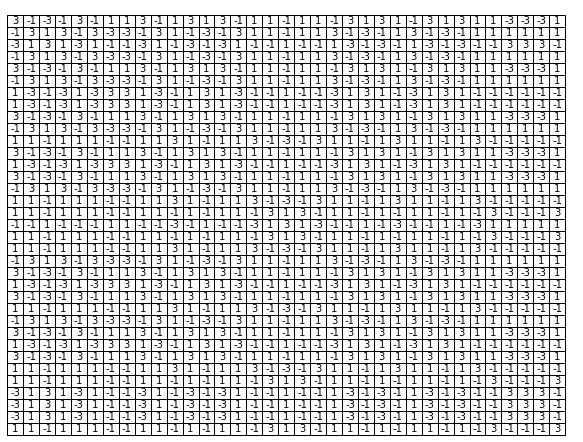

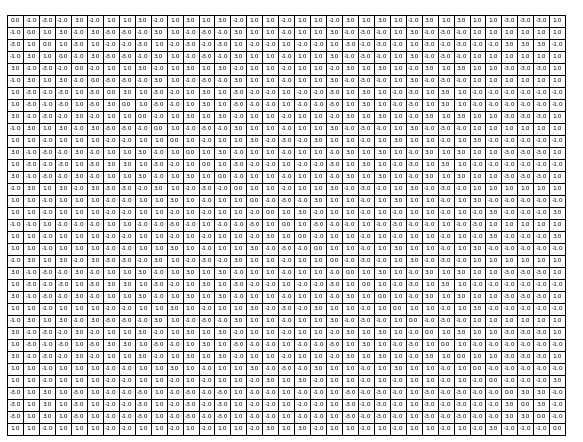

In [ ]:
plt.figure(figsize=(10, 7))
plt.table(W_hebb, loc="best", cellLoc="center")
plt.axis(False)
plt.xticks([])
plt.yticks([])
plt.show()
plt.figure(figsize=(10, 7))
plt.table(W_hebb_modif, loc="best", cellLoc="center")
plt.axis(False)
plt.xticks([])
plt.yticks([])
plt.show()

#PART2

In [ ]:
out_0=im0.T@W_hebb
out0=2*np.heaviside(out_0,0)-1
out_1=im1.T@W_hebb
out1=2*np.heaviside(out_1,0)-1
out_2=im2.T@W_hebb
out2=2*np.heaviside(out_2,0)-1

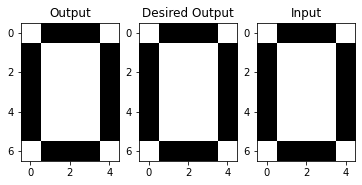

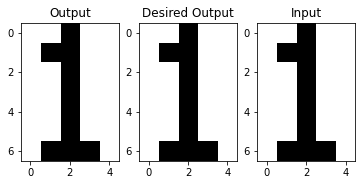

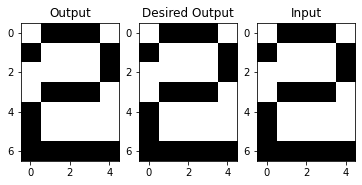

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(out0.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im0.reshape(7, 5), cmap="Greys")
axs[1].set_title("Desired Output")
axs[2].imshow(im0.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out1.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im1.reshape(7, 5), cmap="Greys")
axs[1].set_title("Desired Output")
axs[2].imshow(im1.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out2.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im2.reshape(7, 5), cmap="Greys")
axs[1].set_title("Desired Output")
axs[2].imshow(im2.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.show()

#PART3

In [ ]:
noise20 = np.random.choice([-1, 1], 35, p=[0.2, 0.8])
noise80 = np.random.choice([-1, 1], 35, p=[0.8, 0.2])
noisy20_input1 = noise20 * np.squeeze(im0)
noisy80_input1 = noise80 * np.squeeze(im0)
noisy20_input2 = noise20 * np.squeeze(im1)
noisy80_input2 = noise80 * np.squeeze(im1)
noisy20_input3 = noise20 * np.squeeze(im2)
noisy80_input3 = noise80 * np.squeeze(im2)
out_1 = noisy20_input1 @ W_hebb
out1_20 = 2 * np.heaviside(out_1, 1) - 1
out_2 = noisy20_input2 @ W_hebb
out2_20 = 2 * np.heaviside(out_2, 1) - 1
out_3 = noisy20_input3 @ W_hebb
out3_20 = 2 * np.heaviside(out_3, 1) - 1

out_1 = noisy80_input1 @ W_hebb
out1_80 = 2 * np.heaviside(out_1, 1) - 1
out_2 = noisy80_input2 @ W_hebb
out2_80 = 2 * np.heaviside(out_2, 1) - 1
out_3 = noisy80_input3 @ W_hebb
out3_80 = 2 * np.heaviside(out_3, 1) - 1

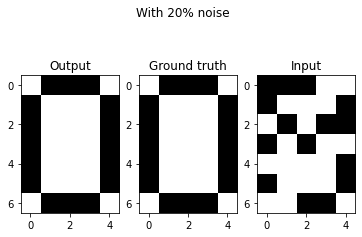

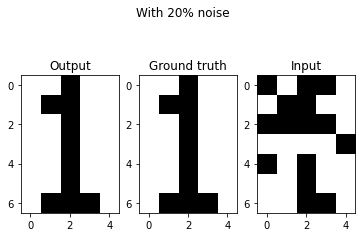

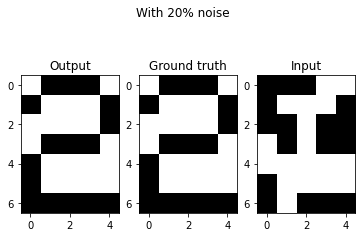

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(out1_20.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im0.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy20_input1.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 20% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out2_20.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im1.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy20_input2.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 20% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out3_20.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im2.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy20_input3.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 20% noise')
plt.show()

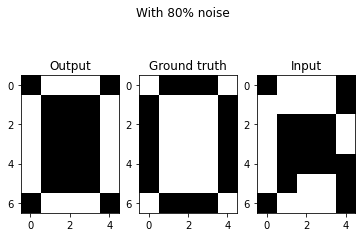

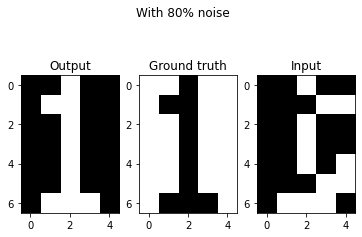

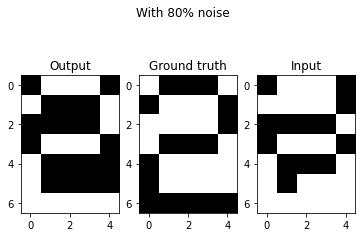

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(out1_80.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im0.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy80_input1.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 80% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out2_80.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im1.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy80_input2.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 80% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out3_80.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im2.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy80_input3.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 80% noise')
plt.show()

In [ ]:
true_out1_20_redu = 0
true_out2_20_redu = 0
true_out3_20_redu = 0
true_out1_80_redu = 0
true_out2_80_redu = 0
true_out3_80_redu = 0
for i in range(100):
    noise20 = np.random.choice([-1, 1], 35, p=[0.2, 0.8])
    noise80 = np.random.choice([-1, 1], 35, p=[0.8, 0.2])
    noisy20_input1 = noise20 * np.squeeze(im0)
    noisy80_input1 = noise80 * np.squeeze(im0)
    noisy20_input2 = noise20 * np.squeeze(im1)
    noisy80_input2 = noise80 * np.squeeze(im1)
    noisy20_input3 = noise20 * np.squeeze(im2)
    noisy80_input3 = noise80 * np.squeeze(im2)
    out_1_redu = noisy20_input1 @ W_hebb
    out1_20_redu = 2 * np.heaviside(out_1_redu, 1) - 1
    out_2_redu = noisy20_input2 @ W_hebb
    out2_20_redu = 2 * np.heaviside(out_2_redu, 1) - 1
    out_3_redu = noisy20_input3 @ W_hebb
    out3_20_redu = 2 * np.heaviside(out_3_redu, 1) - 1

    out_1_redu = noisy80_input1 @ W_hebb
    out1_80_redu = 2 * np.heaviside(out_1_redu, 1) - 1
    out_2_redu = noisy80_input2 @ W_hebb
    out2_80_redu = 2 * np.heaviside(out_2_redu, 1) - 1
    out_3_redu = noisy80_input3 @ W_hebb
    out3_80_redu = 2 * np.heaviside(out_3_redu, 1) - 1
    if (out1_20_redu == np.squeeze(im0)).all():
        true_out1_20_redu = true_out1_20_redu + 1
    if (out2_20_redu == np.squeeze(im1)).all():
        true_out2_20_redu = true_out2_20_redu + 1
    if (out3_20_redu == np.squeeze(im2)).all():
        true_out3_20_redu = true_out3_20_redu + 1

    if (out1_80_redu == np.squeeze(im0)).all():
        true_out1_80_redu = true_out1_80_redu + 1
    if (out2_80_redu == np.squeeze(im1)).all():
        true_out2_80_redu = true_out2_80_redu + 1
    if (out3_80_redu == np.squeeze(im2)).all():
        true_out3_80_redu = true_out3_80_redu + 1

print("Our model gives the correct output for input0 with 20% noise with accuracy =",true_out1_20_redu,"%")
print("Our model gives the correct output for input1 with 20% noise with accuracy =",true_out2_20_redu,"%")
print("Our model gives the correct output for input2 with 20% noise with accuracy =",true_out3_20_redu,"%")
print("Our model gives the correct output for input0 with 80% noise with accuracy =",true_out1_80_redu,"%")
print("Our model gives the correct output for input1 with 80% noise with accuracy =",true_out2_80_redu,"%")
print("Our model gives the correct output for input2 with 80% noise with accuracy =",true_out3_80_redu,"%")

Our model gives the correct output for input0 with 20% noise with accuracy = 90 %
Our model gives the correct output for input1 with 20% noise with accuracy = 95 %
Our model gives the correct output for input2 with 20% noise with accuracy = 88 %
Our model gives the correct output for input0 with 80% noise with accuracy = 0 %
Our model gives the correct output for input1 with 80% noise with accuracy = 0 %
Our model gives the correct output for input2 with 80% noise with accuracy = 0 %


#PART4

In [ ]:
noise20 = np.random.choice([0, 1], 35, p=[0.2, 0.8])
noise80 = np.random.choice([0, 1], 35, p=[0.8, 0.2])
noisy20_input1 = noise20 * np.squeeze(im0)
noisy80_input1 = noise80 * np.squeeze(im0)
noisy20_input2 = noise20 * np.squeeze(im1)
noisy80_input2 = noise80 * np.squeeze(im1)
noisy20_input3 = noise20 * np.squeeze(im2)
noisy80_input3 = noise80 * np.squeeze(im2)
out_1 = noisy20_input1 @ W_hebb
out1_20 = 2 * np.heaviside(out_1, 1) - 1
out_2 = noisy20_input2 @ W_hebb
out2_20 = 2 * np.heaviside(out_2, 1) - 1
out_3 = noisy20_input3 @ W_hebb
out3_20 = 2 * np.heaviside(out_3, 1) - 1

out_1 = noisy80_input1 @ W_hebb
out1_80 = 2 * np.heaviside(out_1, 1) - 1
out_2 = noisy80_input2 @ W_hebb
out2_80 = 2 * np.heaviside(out_2, 1) - 1
out_3 = noisy80_input3 @ W_hebb
out3_80 = 2 * np.heaviside(out_3, 1) - 1

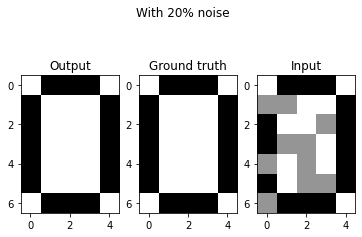

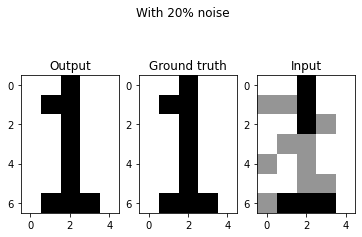

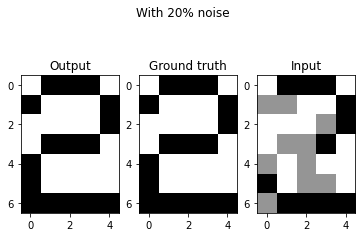

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(out1_20.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im0.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy20_input1.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 20% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out2_20.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im1.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy20_input2.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 20% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out3_20.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im2.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy20_input3.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 20% noise')
plt.show()

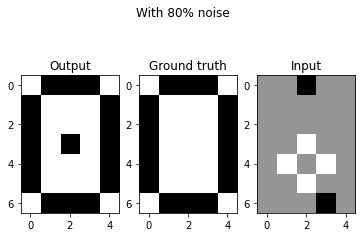

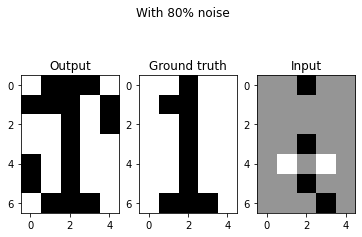

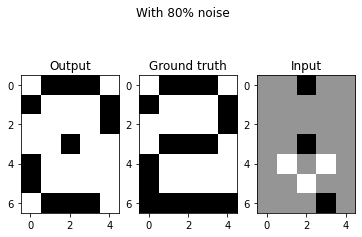

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(out1_80.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im0.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy80_input1.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 80% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out2_80.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im1.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy80_input2.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 80% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out3_80.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im2.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy80_input3.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 80% noise')
plt.show()

#PART5

In [ ]:
%cd /content/drive/My Drive/Extra/

/content/drive/My Drive/Extra


In [ ]:
im0 = cv2.imread("Image_1.png")
im1 = cv2.imread("Image_2.png")
im2 = cv2.imread("Image_3.png")
im3 = cv2.imread("Image_4.png")
im4 = cv2.imread("Image_5.png")
im5 = cv2.imread("Image_6.png")
im6 = cv2.imread("Image_7.png")
im7 = cv2.imread("Image_8.png")
im8 = cv2.imread("Image_9.png")
im9 = cv2.imread("Image_10.png")

In [ ]:
#preprocessing
im0=np.asarray(im0[:,:,0],dtype=np.int32)
im0[im0>0]=-1
im0[im0==0]=1
im0=im0.reshape(35,1)
im1=np.asarray(im1[:,:,0],dtype=np.int32)
im1[im1>0]=-1
im1[im1==0]=1
im1=im1.reshape(35,1)
im2=np.asarray(im2[:,:,0],dtype=np.int32)
im2[im2>0]=-1
im2[im2==0]=1
im2=im2.reshape(35,1)
im3=np.asarray(im3[:,:,0],dtype=np.int32)
im3[im3>0]=-1
im3[im3==0]=1
im3=im3.reshape(35,1)
im4=np.asarray(im4[:,:,0],dtype=np.int32)
im4[im4>0]=-1
im4[im4==0]=1
im4=im4.reshape(35,1)
im5=np.asarray(im5[:,:,0],dtype=np.int32)
im5[im5>0]=-1
im5[im5==0]=1
im5=im5.reshape(35,1)
im6=np.asarray(im6[:,:,0],dtype=np.int32)
im6[im6>0]=-1
im6[im6==0]=1
im6=im6.reshape(35,1)
im7=np.asarray(im7[:,:,0],dtype=np.int32)
im7[im7>0]=-1
im7[im7==0]=1
im7=im7.reshape(35,1)
im8=np.asarray(im8[:,:,0],dtype=np.int32)
im8[im8>0]=-1
im8[im8==0]=1
im8=im8.reshape(35,1)
im9=np.asarray(im9[:,:,0],dtype=np.int32)
im9[im9>0]=-1
im9[im9==0]=1
im9=im9.reshape(35,1)

In [ ]:
W_hebb=im0@im0.T+im1@im1.T+im2@im2.T+im2@im2.T+im3@im3.T+im4@im4.T+im5@im5.T+im6@im6.T+im7@im7.T+im8@im8.T+im9@im9.T
W_hebb_modif =im0@im0.T+im1@im1.T+im2@im2.T-3*np.eye(35)

In [ ]:
T=np.squeeze(np.asarray([im0,im1,im2,im3,im4,im5,im6,im7,im8,im9])).T
P=T
W = T@np.linalg.pinv(P)

In [ ]:
out_0=im0.T@W_hebb
out0=2*np.heaviside(out_0,0)-1

Text(0.5, 1.0, 'Input')

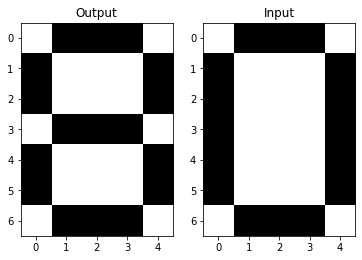

In [ ]:
fig,ax =plt.subplots(1,2)
ax[0].imshow(out0.reshape(7,5),cmap="Greys")
ax[1].imshow(im0.reshape(7,5),cmap="Greys")
ax[0].set_title("Output")
ax[1].set_title("Input")

In [ ]:
out_0=im0.T@W
out0=2*np.heaviside(out_0,0)-1
out_1=im1.T@W
out1=2*np.heaviside(out_1,0)-1
out_2=im2.T@W
out2=2*np.heaviside(out_2,0)-1
out_3=im3.T@W
out3=2*np.heaviside(out_3,0)-1
out_4=im4.T@W
out4=2*np.heaviside(out_4,0)-1
out_5=im5.T@W
out5=2*np.heaviside(out_5,0)-1
out_6=im6.T@W
out6=2*np.heaviside(out_6,0)-1
out_7=im7.T@W
out7=2*np.heaviside(out_7,0)-1
out_8=im8.T@W
out8=2*np.heaviside(out_8,0)-1
out_9=im9.T@W
out9=2*np.heaviside(out_9,0)-1

In [ ]:
noise20 = np.random.choice([-1, 1], 35, p=[0.2, 0.8])
noise80 = np.random.choice([-1, 1], 35, p=[0.8, 0.2])
noisy20_input1 = noise20 * np.squeeze(im0)
noisy80_input1 = noise80 * np.squeeze(im0)
noisy20_input2 = noise20 * np.squeeze(im1)
noisy80_input2 = noise80 * np.squeeze(im1)
noisy20_input3 = noise20 * np.squeeze(im2)
noisy80_input3 = noise80 * np.squeeze(im2)
noisy20_input4 = noise20 * np.squeeze(im3)
noisy80_input4 = noise80 * np.squeeze(im3)
noisy20_input5 = noise20 * np.squeeze(im4)
noisy80_input5 = noise80 * np.squeeze(im4)
noisy20_input6 = noise20 * np.squeeze(im5)
noisy80_input6 = noise80 * np.squeeze(im5)
noisy20_input7 = noise20 * np.squeeze(im6)
noisy80_input7 = noise80 * np.squeeze(im6)
noisy20_input8 = noise20 * np.squeeze(im7)
noisy80_input8 = noise80 * np.squeeze(im7)
noisy20_input9 = noise20 * np.squeeze(im8)
noisy80_input9 = noise80 * np.squeeze(im8)
noisy20_input10 = noise20 * np.squeeze(im9)
noisy80_input10 = noise80 * np.squeeze(im9)

out_1 = noisy20_input1 @ W
out1_20 = 2 * np.heaviside(out_1, 1) - 1
out_2 = noisy20_input2 @ W
out2_20 = 2 * np.heaviside(out_2, 1) - 1
out_3 = noisy20_input3 @ W
out3_20 = 2 * np.heaviside(out_3, 1) - 1
out_4 = noisy20_input3 @ W
out4_20 = 2 * np.heaviside(out_4, 1) - 1
out_5 = noisy20_input3 @ W
out5_20 = 2 * np.heaviside(out_5, 1) - 1
out_6 = noisy20_input3 @ W
out6_20 = 2 * np.heaviside(out_6, 1) - 1
out_7 = noisy20_input3 @ W
out7_20 = 2 * np.heaviside(out_7, 1) - 1
out_8 = noisy20_input3 @ W
out8_20 = 2 * np.heaviside(out_8, 1) - 1
out_9 = noisy20_input3 @ W
out9_20 = 2 * np.heaviside(out_9, 1) - 1
out_10 = noisy20_input3 @ W
out10_20 = 2 * np.heaviside(out_10, 1) - 1

out_1 = noisy80_input1 @ W
out1_80 = 2 * np.heaviside(out_1, 1) - 1
out_2 = noisy80_input2 @ W
out2_80 = 2 * np.heaviside(out_2, 1) - 1
out_3 = noisy80_input3 @ W
out3_80 = 2 * np.heaviside(out_3, 1) - 1
out_4 = noisy80_input3 @ W
out4_80 = 2 * np.heaviside(out_4, 1) - 1
out_5 = noisy80_input3 @ W
out5_80 = 2 * np.heaviside(out_5, 1) - 1
out_6 = noisy80_input3 @ W
out6_80 = 2 * np.heaviside(out_6, 1) - 1
out_7 = noisy80_input3 @ W
out7_80 = 2 * np.heaviside(out_7, 1) - 1
out_8 = noisy80_input3 @ W
out8_80 = 2 * np.heaviside(out_8, 1) - 1
out_9 = noisy80_input3 @ W
out9_80 = 2 * np.heaviside(out_9, 1) - 1
out_10 = noisy80_input3 @ W
out10_80 = 2 * np.heaviside(out_10, 1) - 1

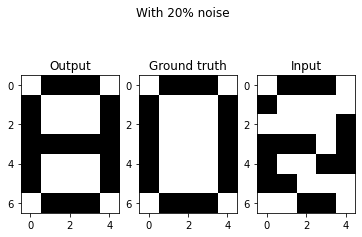

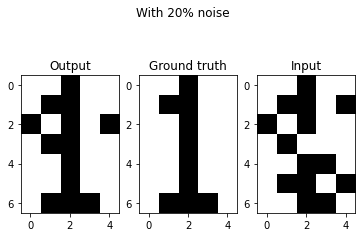

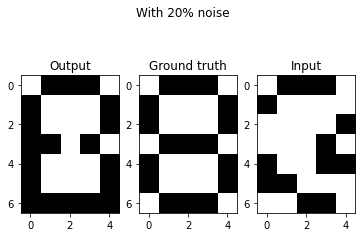

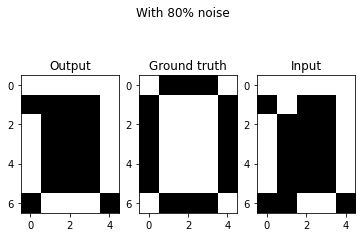

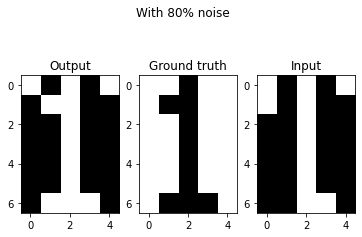

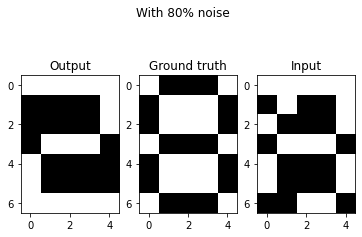

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(out1_20.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im0.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy20_input1.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 20% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out2_20.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im1.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy20_input2.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 20% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out9_20.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im8.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy20_input9.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 20% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out1_80.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im0.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy80_input1.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 80% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out2_80.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im1.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy80_input2.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 80% noise')
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(out9_80.reshape(7, 5), cmap="Greys")
axs[0].set_title("Output")
axs[1].imshow(im8.reshape(7, 5), cmap="Greys")
axs[1].set_title("Ground truth")
axs[2].imshow(noisy80_input9.reshape(7, 5), cmap="Greys")
axs[2].set_title("Input")
plt.suptitle('With 80% noise')
plt.show()